# DNN MNIST

## Import libraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt

## Load MNIST Dataset and split it

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



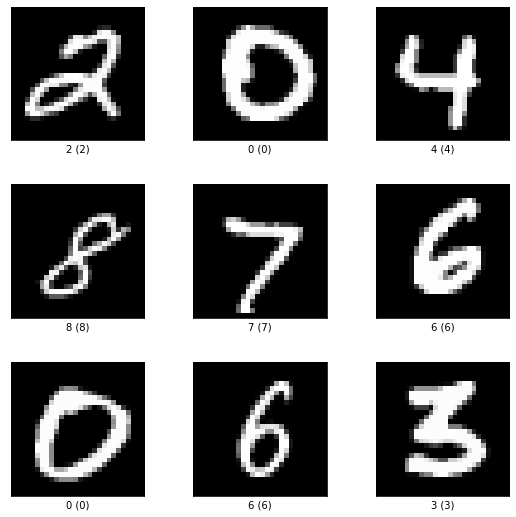

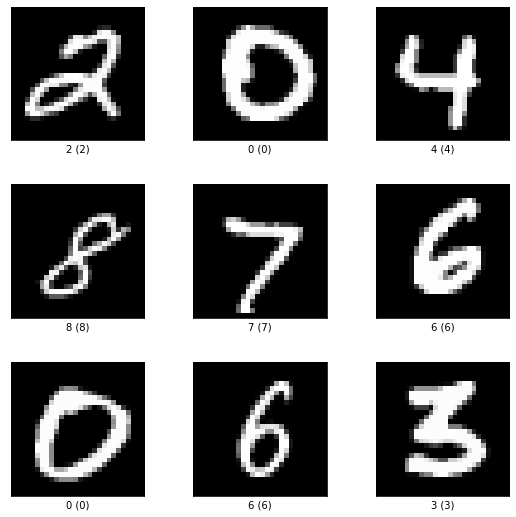

In [ ]:
# Load full size of MNIST
MNIST_full, MNIST_info = tfds.load(
    'mnist',
    split='train+test',
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print(MNIST_info)

tfds.show_examples(MNIST_full, MNIST_info)

In [ ]:
# Dataset size of MNIST
mnist_dataset_size = float( tf.data.experimental.cardinality(MNIST_full) )
print('Full dataset size of MNIST:', mnist_dataset_size)

Full dataset size of MNIST: 70000.0


In [ ]:
# Split full dataset into train:test = 80:20
train_test_split = 0.8

mnist_train_size = round(mnist_dataset_size * train_test_split)
mnist_test_size = round(mnist_dataset_size - mnist_train_size)


MNIST_train = MNIST_full.take(mnist_train_size)
print('Size of Train_set:', mnist_train_size)

MNIST_test = MNIST_full.skip(mnist_train_size)
print('Size of Test_set:', mnist_test_size)

Size of Train_set: 56000
Size of Test_set: 14000


## Prepare x, y

In [ ]:
x_train = []
x_test = []
y_train = []
y_test = []

for images, labels in MNIST_train:
  x_train.append(images.numpy())
  y_train.append(labels.numpy())

for images, labels in MNIST_test:
  x_test.append(images.numpy())
  y_test.append(labels.numpy())

# Normalize pixel values to 0 ~ 1
x_train, x_test = x_train / np.asarray(255.0), x_test / np.asarray(255.0)

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 28, 28, 1)
shape of train_labels: (56000,)
shape of test_images: (14000, 28, 28, 1)
shape of test_labels: (14000,)


### Normalize

In [ ]:
# Normalize pixel values to 0 ~ 1
x_train, x_test = x_train / np.asarray(255.0), x_test / np.asarray(255.0)

### Reshape

In [ ]:
# Reshape data from 56000*28*28 to 56000*764
x_train = np.reshape(x_train ,(56000, 784))
x_test = np.reshape(x_test, (14000, 784))

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 784)
shape of train_labels: (56000,)
shape of test_images: (14000, 784)
shape of test_labels: (14000,)


### Transform to one-hot encoding

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print("Shape after one-hot encoding: ", y_train.shape)

Shape after one-hot encoding:  (56000, 10)


## DNN Model for MNIST

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(256, activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation('softmax')))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20,  batch_size=128, verbose=2, validation_data=(x_test, y_test))

Epoch 1/20
438/438 - 4s - loss: 1.0505 - accuracy: 0.6507 - val_loss: 0.5025 - val_accuracy: 0.8545
Epoch 2/20
438/438 - 3s - loss: 0.4429 - accuracy: 0.8666 - val_loss: 0.3468 - val_accuracy: 0.8965
Epoch 3/20
438/438 - 3s - loss: 0.3344 - accuracy: 0.9001 - val_loss: 0.2805 - val_accuracy: 0.9179
Epoch 4/20
438/438 - 3s - loss: 0.2705 - accuracy: 0.9181 - val_loss: 0.2380 - val_accuracy: 0.9301
Epoch 5/20
438/438 - 3s - loss: 0.2287 - accuracy: 0.9313 - val_loss: 0.2016 - val_accuracy: 0.9401
Epoch 6/20
438/438 - 3s - loss: 0.1963 - accuracy: 0.9415 - val_loss: 0.1733 - val_accuracy: 0.9487
Epoch 7/20
438/438 - 3s - loss: 0.1682 - accuracy: 0.9498 - val_loss: 0.1526 - val_accuracy: 0.9557
Epoch 8/20
438/438 - 3s - loss: 0.1522 - accuracy: 0.9545 - val_loss: 0.1400 - val_accuracy: 0.9595
Epoch 9/20
438/438 - 3s - loss: 0.1364 - accuracy: 0.9592 - val_loss: 0.1387 - val_accuracy: 0.9582
Epoch 10/20
438/438 - 3s - loss: 0.1258 - accuracy: 0.9610 - val_loss: 0.1254 - val_accuracy: 0.9624

## Plot  history

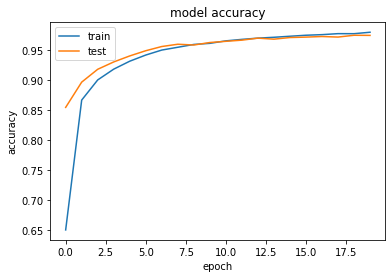

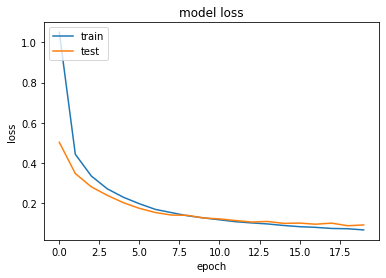

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# DNN KMNIST

## Load KMNIST Dataset and split it

Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incompleteK52X40/kmnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incompleteK52X40/kmnist-test.tfrecord


Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


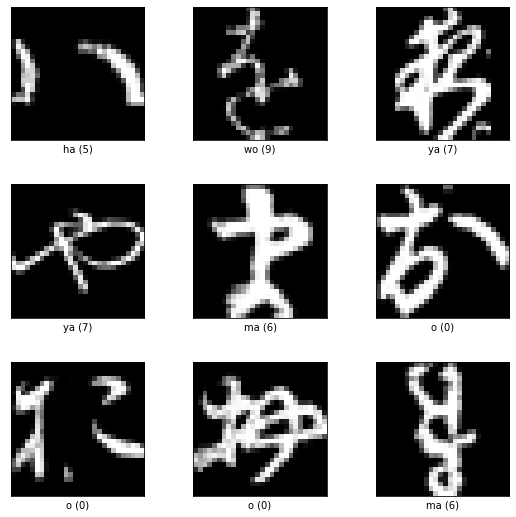

Full dataset size of KMNIST: 70000.0
Size of Train_set: 56000
Size of Test_set: 14000


In [ ]:
# Load full size of MNIST
KMNIST_full, KMNIST_info = tfds.load(
    'kmnist',
    split='train+test',
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
tfds.show_examples(KMNIST_full, KMNIST_info)


# Print dataset size of MNIST
kmnist_dataset_size = float( tf.data.experimental.cardinality(KMNIST_full) )
print('Full dataset size of KMNIST:', kmnist_dataset_size)

# Split full dataset into train:test = 80:20
train_test_split = 0.8

kmnist_train_size = round(kmnist_dataset_size * train_test_split)
kmnist_test_size = round(kmnist_dataset_size - kmnist_train_size)

KMNIST_train = KMNIST_full.take(kmnist_train_size)
print('Size of Train_set:', kmnist_train_size)

KMNIST_test = KMNIST_full.skip(kmnist_train_size)
print('Size of Test_set:', kmnist_test_size)

## Prepare x,y

In [ ]:
x_train = []
x_test = []
y_train = []
y_test = []
for images, labels in KMNIST_train:
  x_train.append(images.numpy())
  y_train.append(labels.numpy())

for images, labels in KMNIST_test:
  x_test.append(images.numpy())
  y_test.append(labels.numpy())

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 28, 28, 1)
shape of train_labels: (56000,)
shape of test_images: (14000, 28, 28, 1)
shape of test_labels: (14000,)


### Normalize

In [ ]:
# Normalize pixel values to 0 ~ 1
x_train, x_test = x_train / np.asarray(255.0), x_test / np.asarray(255.0)

### Reshape

In [ ]:
# Reshape data from 56000*28*28 to 56000*764
x_train = np.reshape(x_train ,(56000, 784))
x_test = np.reshape(x_test, (14000, 784))

In [ ]:
print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 784)
shape of train_labels: (56000,)
shape of test_images: (14000, 784)
shape of test_labels: (14000,)


### Transform to one-hot encoding

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print("Shape after one-hot encoding: ", y_train.shape)

Shape after one-hot encoding:  (56000, 10)


## DNN Model for KMNIST

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(256, activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation('softmax')))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20,  batch_size=128, verbose=2, validation_data=(x_test, y_test))

Epoch 1/20
438/438 - 4s - loss: 0.5981 - accuracy: 0.8129 - val_loss: 0.2663 - val_accuracy: 0.9195
Epoch 2/20
438/438 - 3s - loss: 0.2850 - accuracy: 0.9141 - val_loss: 0.1898 - val_accuracy: 0.9438
Epoch 3/20
438/438 - 3s - loss: 0.2160 - accuracy: 0.9339 - val_loss: 0.1725 - val_accuracy: 0.9474
Epoch 4/20
438/438 - 3s - loss: 0.1704 - accuracy: 0.9467 - val_loss: 0.1571 - val_accuracy: 0.9530
Epoch 5/20
438/438 - 3s - loss: 0.1447 - accuracy: 0.9558 - val_loss: 0.1398 - val_accuracy: 0.9582
Epoch 6/20
438/438 - 3s - loss: 0.1240 - accuracy: 0.9602 - val_loss: 0.1453 - val_accuracy: 0.9602
Epoch 7/20
438/438 - 3s - loss: 0.1112 - accuracy: 0.9640 - val_loss: 0.1406 - val_accuracy: 0.9609
Epoch 8/20
438/438 - 3s - loss: 0.0994 - accuracy: 0.9698 - val_loss: 0.1321 - val_accuracy: 0.9646
Epoch 9/20
438/438 - 3s - loss: 0.0880 - accuracy: 0.9719 - val_loss: 0.1378 - val_accuracy: 0.9634
Epoch 10/20
438/438 - 3s - loss: 0.0824 - accuracy: 0.9732 - val_loss: 0.1472 - val_accuracy: 0.9614

## Plot  history

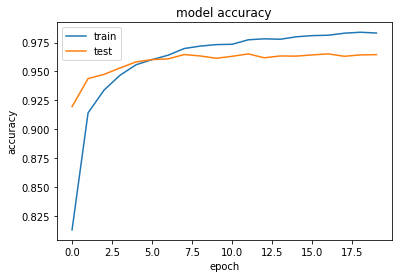

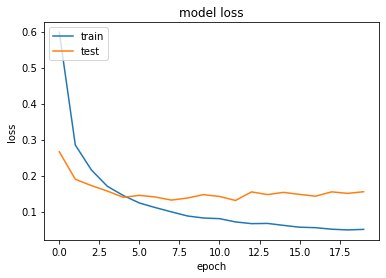

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()